In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sns.set_style("darkgrid")
nlp = spacy.load("en_core_web_trf")

def plot_common_words(worder_counter, top_n=30):
    
    df = pd.DataFrame(worder_counter.most_common(top_n), columns=['words', 'counts'])
    
    plt.figure(figsize=(7, 5))
    sns.barplot(y="words", x='counts', data=df)
    plt.title('Word frequency')
    plt.show()

def get_word_counter(tokenized_sents):
    word_counter = Counter()
    for sent in tokenized_sents:
        for token in sent:
            word_counter[token] += 1
    return word_counter

def tokenize_text(df):
    tokenized_docs = []
    for ind in df.index:
        text = df.lyrics[ind]
        text = re.sub(r'\[Chorus\S*\s*\S*\]', '', text)
        doc = nlp(text)
        tokens = [t.lemma_.lower() for t in doc if '\n' not in t.text and not t.is_stop and not t.is_punct]
        tokenized_docs.append(tokens)
    return tokenized_docs

In [2]:
lyrics_df = pd.read_csv('data/lyrics_mileycyrus.csv', index_col=0)
lyrics_df.album_info.unique()

array(['soundtrack: "Hannah Montana 2: Meet Miley Cyrus" (2007)',
       'album: "Breakout" (2008)',
       'soundtrack: "Hannah Montana: The Movie" (2009)',
       'EP: "The Time Of Our Lives" (2009)',
       'album: "Can\'t Be Tamed" (2010)', 'album: "Bangerz" (2013)',
       'album: "Miley Cyrus And Her Dead Petz" (2015)',
       'album: "Younger Now" (2017)', 'EP: "SHE IS COMING" (2019)',
       'album: "Plastic Hearts" (2020)', nan], dtype=object)

In [3]:
lyrics_df['release_type'] = ''
lyrics_df['release_year'] = ''

for i in lyrics_df.dropna(subset=['album_info']).index:
    album_info = lyrics_df.album_info[i]
    lyrics_df.loc[i, 'release_type'] = album_info.split(': ')[0]
    lyrics_df.loc[i, 'release_year'] = int(album_info.split('" (')[1].replace(')', ''))
    
display(lyrics_df.head(3))

lyrics_df.shape

,album_info,album_title,lyrics,song_title,song_detail,release_type,release_year
0,"soundtrack: ""Hannah Montana 2: Meet Miley Cyru...","""Hannah Montana 2: Meet Miley Cyrus""",\n\r\nI got my sights set on you and I'm ready...,See You Again,"(from ""Hannah Montana 2: Meet Miley Cyrus"" sou...",soundtrack,2007
1,"soundtrack: ""Hannah Montana 2: Meet Miley Cyru...","""Hannah Montana 2: Meet Miley Cyrus""",\n\r\nMy problem isn't that I miss you\n'Cause...,East Northumberland High,"(from ""Hannah Montana 2: Meet Miley Cyrus"" sou...",soundtrack,2007
2,"soundtrack: ""Hannah Montana 2: Meet Miley Cyru...","""Hannah Montana 2: Meet Miley Cyrus""",\n\r\nThe weekend's almost done\nThe moon is l...,Let's Dance,"(from ""Hannah Montana 2: Meet Miley Cyrus"" sou...",soundtrack,2007


(160, 7)

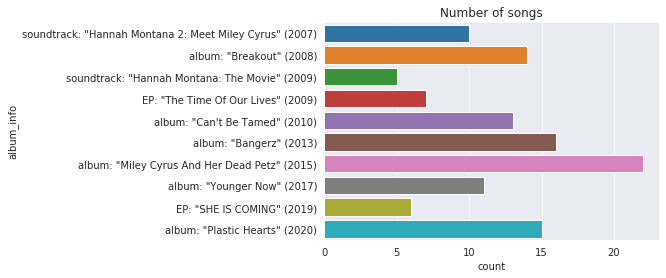

In [4]:
sns.countplot(y='album_info', data=lyrics_df)
plt.title('Number of songs')
plt.show()

In [5]:
%%time
lyrics_df['tokens'] = tokenize_text(lyrics_df)

CPU times: user 7min 18s, sys: 2.08 s, total: 7min 20s
Wall time: 2min 7s


In [6]:
lyrics_df['n_words'] = lyrics_df.tokens.map(len)
lyrics_df['unique_tokens'] = lyrics_df.tokens.map(np.unique)
lyrics_df['n_unique_words'] = lyrics_df.unique_tokens.map(len)
lyrics_df.head(2)

,album_info,album_title,lyrics,song_title,song_detail,release_type,release_year,tokens,n_words,unique_tokens,n_unique_words
0,"soundtrack: ""Hannah Montana 2: Meet Miley Cyru...","""Hannah Montana 2: Meet Miley Cyrus""",\n\r\nI got my sights set on you and I'm ready...,See You Again,"(from ""Hannah Montana 2: Meet Miley Cyrus"" sou...",soundtrack,2007,"[got, sight, set, ready, aim, heart, tame, kno...",146,"['bout, 'cause, aim, ask, breathe, call, conne...",56
1,"soundtrack: ""Hannah Montana 2: Meet Miley Cyru...","""Hannah Montana 2: Meet Miley Cyrus""",\n\r\nMy problem isn't that I miss you\n'Cause...,East Northumberland High,"(from ""Hannah Montana 2: Meet Miley Cyrus"" sou...",soundtrack,2007,"[problem, miss, 'cause, problem, kiss, whoa, f...",128,"['cause, away, catch, change, clearly, clue, c...",63


2107 unique words


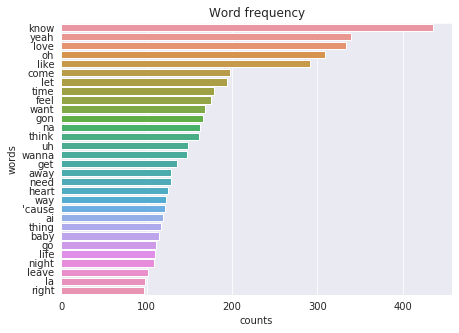

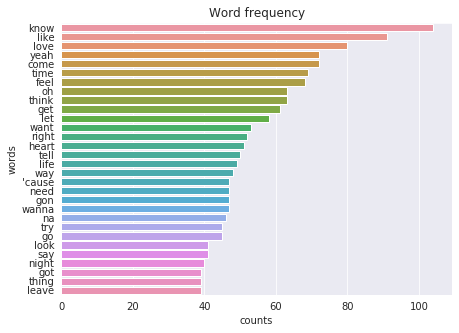

In [7]:
word_counter = get_word_counter(lyrics_df.tokens)
print(len(word_counter), 'unique words')
plot_common_words(word_counter)

unique_word_counter = get_word_counter(lyrics_df.unique_tokens.values)

plot_common_words(unique_word_counter)

In [8]:
import random
rare_words = [key for key in word_counter if word_counter[key] < 2]
print(len(rare_words), 'words are used ones')
print('Examples:')
print(random.sample(rare_words, 10))


867 words are used ones
Examples:
['x8', 'fightin', 'backseat', 'eve', 'sincere', 'daylight', 'misread', 'last', 'countin', 'complete']


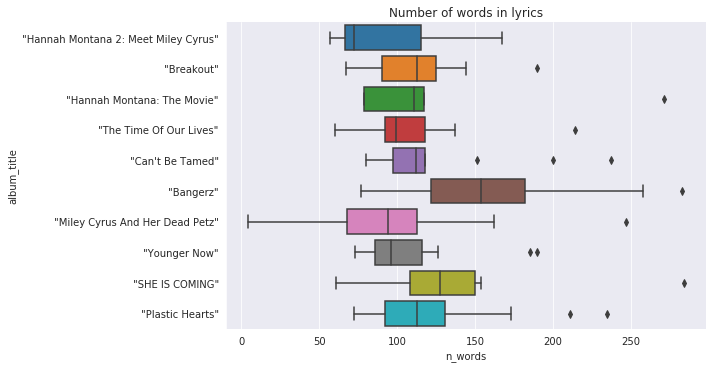

In [10]:
order = lyrics_df.album_title.dropna().unique()

sns.catplot(y="album_title", x="n_words", kind="box", data=lyrics_df, aspect=2, order=order)
plt.title('Number of words in lyrics')
plt.show()

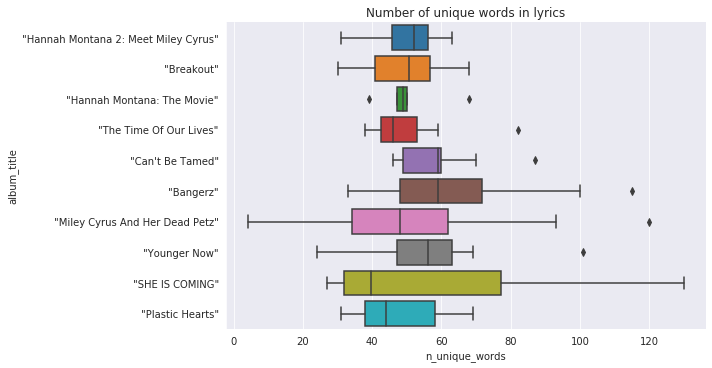

In [11]:
sns.catplot(y="album_title", x="n_unique_words", kind="box", data=lyrics_df, aspect=2, order=order)
plt.title('Number of unique words in lyrics')
plt.show()

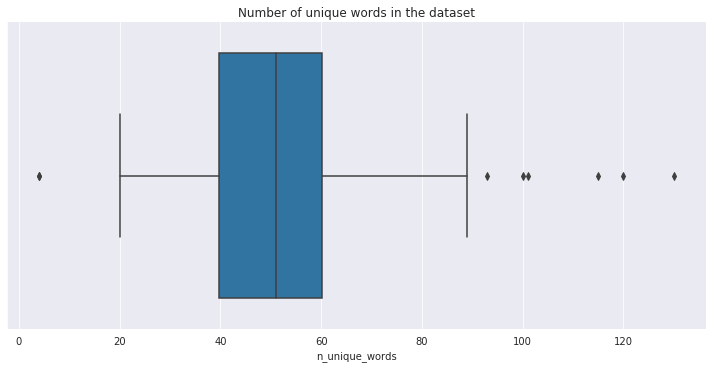

In [12]:
sns.catplot(x="n_unique_words", kind="box", data=lyrics_df, aspect=2, order=order)
plt.title('Number of unique words in the dataset')
plt.show()

In [13]:
lyrics_df.groupby('album_title').mean()

,n_words,n_unique_words
album_title,,
"""Bangerz""",159.375000,63.812500
"""Breakout""",113.571429,49.000000
"""Can't Be Tamed""",123.538462,57.923077
"""Hannah Montana 2: Meet Miley Cyrus""",91.600000,50.300000
"""Hannah Montana: The Movie""",131.400000,50.600000
"""Miley Cyrus And Her Dead Petz""",94.000000,49.272727
"""Plastic Hearts""",124.000000,48.133333
"""SHE IS COMING""",143.166667,59.166667
"""The Time Of Our Lives""",113.285714,51.000000


In [14]:
albums_features = []
for year, df in lyrics_df.groupby('release_year'):
#     display(df)
    
    for name, df_album in df.groupby('album_title'):
        print('Release:', year, name)
        print('Number of songs:', len(df_album))
        word_counter = get_word_counter(df_album.tokens.values)
        print('Unique words:', len(list(word_counter.elements())))
        print(df_album.n_words.mean())
        print(df_album.n_unique_words.mean())
        print()


Release: 2007 "Hannah Montana 2: Meet Miley Cyrus"
Number of songs: 10
Unique words: 916
91.6
50.3

Release: 2008 "Breakout"
Number of songs: 14
Unique words: 1590
113.57142857142857
49.0

Release: 2009 "Hannah Montana: The Movie"
Number of songs: 5
Unique words: 657
131.4
50.6

Release: 2009 "The Time Of Our Lives"
Number of songs: 7
Unique words: 793
113.28571428571429
51.0

Release: 2010 "Can't Be Tamed"
Number of songs: 13
Unique words: 1606
123.53846153846153
57.92307692307692

Release: 2013 "Bangerz"
Number of songs: 16
Unique words: 2550
159.375
63.8125

Release: 2015 "Miley Cyrus And Her Dead Petz"
Number of songs: 22
Unique words: 2068
94.0
49.27272727272727

Release: 2017 "Younger Now"
Number of songs: 11
Unique words: 1208
109.81818181818181
56.90909090909091

Release: 2019 "SHE IS COMING"
Number of songs: 6
Unique words: 859
143.16666666666666
59.166666666666664

Release: 2020 "Plastic Hearts"
Number of songs: 15
Unique words: 1860
124.0
48.13333333333333

